In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Tips.xlsx')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [80]:
df.drop(244,inplace = True)

**1.What is the overall average tip?**

In [81]:
df['tip'].mean()

2.9982786885245902

**2.Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?**


In [82]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

There is no large different between mean and median so data is not skewed.

**3.Prepare a boxplot for 'tip', are there any outliers?**


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


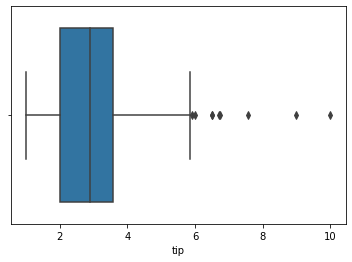

In [83]:
sns.boxplot(df['tip'])
plt.show()

Yes,there are outiers after six.

**4.Prepare a boxplot for 'total_bill', are there any outliers?**


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


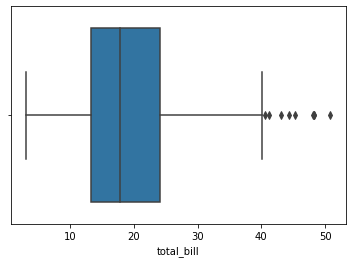

In [84]:
sns.boxplot(df['total_bill'])
plt.show()

Yes,there are outliers after 40.

**5.Gender: what is the percent of females in the data?** 


In [85]:
df.sex.value_counts(normalize = True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

percent of female in the data is 35.655

**6.Prepare a bar plot with the bars representing the percentage of records for each gender.**


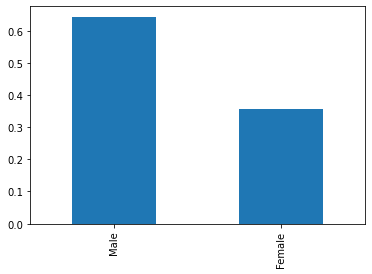

In [86]:
df.sex.value_counts(normalize = True).plot.bar()
plt.show()

**7.Does the average tip differ by gender? Does one gender tip more than the other?**


[]

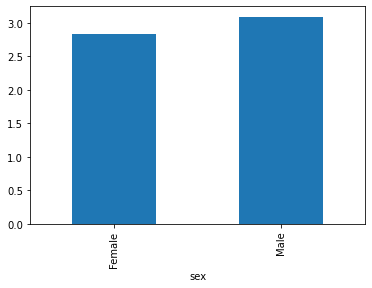

In [87]:
df.groupby('sex')['tip'].mean().plot.bar()
plt.plot()

yes,male gives slightly more tips than the female .

**8.Does the average tip differ by the time of day?**


In [88]:
df.groupby('time')['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

yes, people in dinner gives more tip than the people in lunch.

**9.Does the average tip differ by size (number of people at the table)?** 


In [89]:
df.groupby('size')['tip'].mean()

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

yes,more number of people increase in the tips.

**10.Do smokers tip more than non-smokers?**


In [90]:
df.groupby('smoker')['tip'].sum()

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

No,non-smoker gives more tips than the smoker.

**11.Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?**


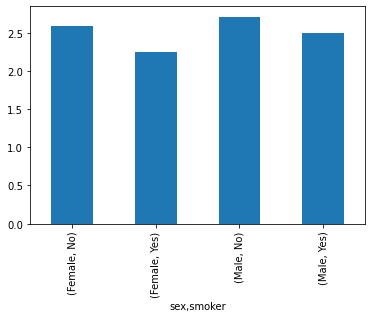

In [91]:
df.groupby(['sex','smoker'])['size'].mean().plot.bar()
plt.show()

male who are non-smoker give more tip than others

**12.Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.**


In [92]:
df['pct_tip'] = df['tip'] / df['total_bill'] #tips.insert(2,"pct_tip",tips.tip/tips.total_bill)
df

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2.0,0.098204


**13.Does pct_tip differ by gender? Does one gender tip more than the other?**


In [93]:
df.groupby('sex')['pct_tip'].sum()

sex
Female    14.484694
Male      24.751136
Name: pct_tip, dtype: float64

In [ ]:
yes,it differs male give more than the women.

**14.Does pct_tip differ by size (number of people at the table)?** 


In [94]:
df.groupby('size')['pct_tip'].sum()

size
1.0     0.869168
2.0    25.852194
3.0     5.781960
4.0     5.400113
5.0     0.707477
6.0     0.624917
Name: pct_tip, dtype: float64

yes,it differs table with size 2 has given more pct_tip.

**15.Make the gender vs. smoker view using pct_tip  - does your inference change?**


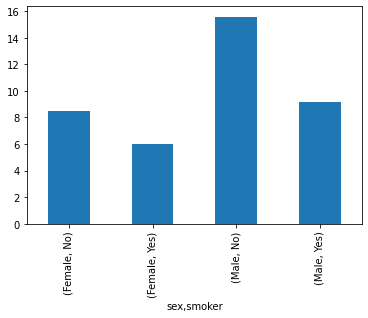

In [95]:
df.groupby(['sex','smoker'])['pct_tip'].sum().plot.bar()
plt.show()

No,there is no change in our inference

**16.Make a scatter plot of total_bill vs. tip.**


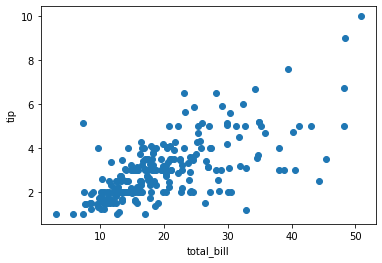

In [96]:
plt.scatter(x= df.total_bill, y = df.tip)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

**17.Make a scatter plot of total_bill vs. pct_tip.**


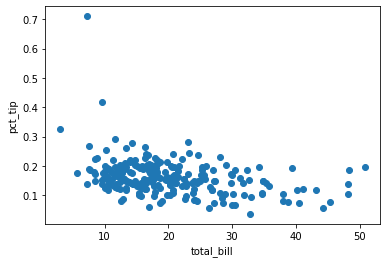

In [97]:
plt.scatter(x= df.total_bill, y = df.pct_tip)
plt.xlabel('total_bill')
plt.ylabel('pct_tip')
plt.show()